<a href="https://colab.research.google.com/github/Pillangocska/Machine_Learning_VIMIMA05/blob/main/ML_lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konvolúciós neurális hálózatok

A gyakorlaton KRESZ táblákat fogunk osztályozni konvolúciós neurális hálózatokkal. Ehhez először letöltjük, majd beolvassuk az adatokat:

In [1]:
!wget 'https://github.com/bolgarbe/gt-data/raw/master/kresz.npz'

--2024-03-13 16:42:45--  https://github.com/bolgarbe/gt-data/raw/master/kresz.npz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bolgarbe/gt-data/master/kresz.npz [following]
--2024-03-13 16:42:45--  https://raw.githubusercontent.com/bolgarbe/gt-data/master/kresz.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69108046 (66M) [application/octet-stream]
Saving to: ‘kresz.npz’

kresz.npz           100%[===================>]  65.91M   194MB/s    in 0.3s    

2024-03-13 16:42:45 (194 MB/s) - ‘kresz.npz’ saved [69108046/69108046]



In [2]:
import numpy as np
from matplotlib import pyplot as plt

import torch

In [3]:
data = np.load('kresz.npz')
x_train = data['x_train']
x_test  = data['x_test']
y_train = data['y_train']
y_test  = data['y_test']

Az `x_train` változó a tanítóhalmaz képeit, az `y_train` változó a hozzájuk tartozó címkéket tárolja. Próbaképpen vizsgáljuk meg, hogy mit is tartalmaznak ezek a változók:

In [4]:
# Kommenteld ki, futtasd le!
print("x train")
print(x_train)
print("y train")
y_train

x train
[[[[8.76348019e-01 1.00000000e+00 9.96997535e-01]
   [8.74337494e-01 9.99080896e-01 9.95159328e-01]
   [8.79637718e-01 9.97935832e-01 1.00000000e+00]
   ...
   [8.23223054e-01 9.99061763e-01 9.95772064e-01]
   [8.11397076e-01 9.94975507e-01 9.91616905e-01]
   [8.16230059e-01 9.99812365e-01 9.96809900e-01]]

  [[8.91850471e-01 1.00000000e+00 1.00000000e+00]
   [8.74299169e-01 9.94703591e-01 9.91727948e-01]
   [8.81188750e-01 9.99636173e-01 9.99636173e-01]
   ...
   [8.36458325e-01 1.00000000e+00 1.00000000e+00]
   [8.29480708e-01 9.93539393e-01 9.93539393e-01]
   [8.24448526e-01 1.00000000e+00 1.00000000e+00]]

  [[8.94159794e-01 1.00000000e+00 1.00000000e+00]
   [8.86400878e-01 1.00000000e+00 1.00000000e+00]
   [8.77424181e-01 9.97767329e-01 9.97767329e-01]
   ...
   [8.44362736e-01 9.96078432e-01 9.96289074e-01]
   [8.49509776e-01 9.96078432e-01 1.00000000e+00]
   [8.31617653e-01 9.96120572e-01 1.00000000e+00]]

  ...

  [[3.21875006e-01 2.84520537e-01 2.24042580e-01]
   [3.44

array([17, 17, 17, ..., 30, 30, 30])

Jobban látszik, ha kiírjuk a dimenziókat:

In [5]:
print(x_train.shape)
print(y_train.shape)

(4575, 32, 32, 3)
(4575,)


Tehát az `x_train` változó $4575$ darab $32\times 32$ RGB képet tárol (ez $4575\times 32\times 32\times 3$ darab, $0$ és $1$ közötti valós szám); hasonlóképpen, az `y_train` változóban 4575 címke szerepel ($0$ és $61$ közötti egész számok).

**1. feladat.** Vizsgáld meg, hogy mely típusú KRESZ-táblából van a legtöbb, ill. legkevesebb a tanító adatbázisban, rajzolj ki egy-egy példát!

{0: 15, 1: 110, 2: 13, 3: 15, 4: 15, 5: 11, 6: 18, 7: 157, 8: 27, 9: 18, 10: 21, 11: 7, 12: 18, 13: 90, 14: 43, 15: 9, 16: 9, 17: 79, 18: 81, 19: 231, 20: 42, 21: 43, 22: 375, 23: 15, 24: 48, 25: 42, 26: 6, 27: 18, 28: 125, 29: 33, 30: 37, 31: 63, 32: 316, 33: 12, 34: 46, 35: 60, 36: 18, 37: 98, 38: 285, 39: 196, 40: 242, 41: 148, 42: 35, 43: 30, 44: 48, 45: 74, 46: 44, 47: 147, 48: 11, 49: 12, 50: 15, 51: 27, 52: 27, 53: 199, 54: 118, 55: 12, 56: 95, 57: 78, 58: 15, 59: 42, 60: 9, 61: 282}


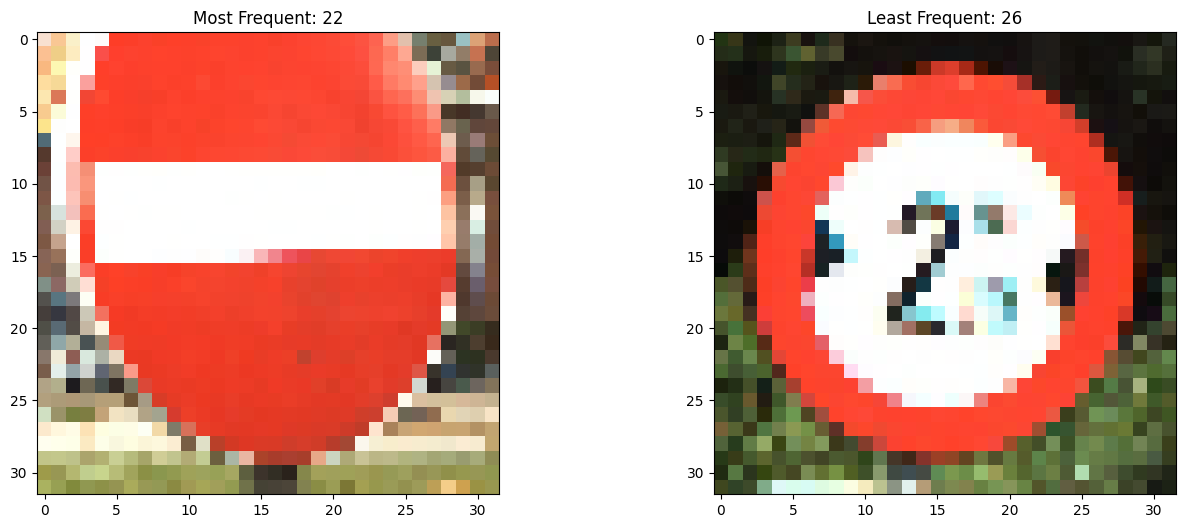

In [6]:
# count occurrences of each label
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))

# identify max and min
most_frequent_label = max(label_counts, key=label_counts.get)
least_frequent_label = min(label_counts, key=label_counts.get)
print(label_counts)

# example image for the most and least frequent labels
most_frequent_example_index = np.where(y_train == most_frequent_label)[0][0]
least_frequent_example_index = np.where(y_train == least_frequent_label)[0][0]

# example images
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_train[most_frequent_example_index])
plt.title(f'Most Frequent: {most_frequent_label}')

plt.subplot(1, 2, 2)
plt.imshow(x_train[least_frequent_example_index])
plt.title(f'Least Frequent: {least_frequent_label}')

plt.show()

A `PyTorch` könyvtár az adatokat saját adattípusba (`torch.Tensor`) csomagolva várja. Képek esetén az adatszerkezet némiképp eltér az eddigitől:

(`mintaszám` $\times$ `sor` $\times$ `oszlop` $\times$ `szín`) helyett (`mintaszám` $\times$ `szín` $\times$ `sor` $\times$ `oszlop`)

Ezért a tenzorrá alakításnál át kell variálnunk a sorrendet:

In [7]:
x_train_tensor = torch.tensor(x_train).permute(0,3,1,2)
y_train_tensor = torch.tensor(y_train)

**2. feladat.** Hozz létre egy `DataLoader` objektumot, ami az adat minibatch-ekre bontását fogja végezni! Állíts be megfelelő batch méretet, illetve gondoskodj róla, hogy az adatok véletlenszerű sorrendben érkezzenek.

Dokumentáció:
https://pytorch.org/docs/stable/data.html

In [8]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(x_train_tensor,y_train_tensor)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

**3. feladat.** Hozz létre az előadáson bemutatotthoz hasonló konvolúciós neurális architektúrát a képek osztályozására! (Első körben csak futtasd le ezt, később kell majd finomhangolni a megfelelő prediktív teljesítmény elérése érdekében.)

Dokumentáció:

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


Original Network:
Egyszerű háló egyetlen konvolúciós réteggel és ReLU aktivációval

```
net = torch.nn.Sequential(                          # [Bemenet:                               -> (batch_size x 3 x 32 x 32)]
  torch.nn.Conv2d(3,32,(4,4),stride=2,padding=1),   # Konvolúciós réteg                       -> (batch_size x 32 x 16 x 16)
  torch.nn.ReLU(),                                  # ReLU aktiváció                          -> (batch_size x 32 x 16 x 16)
  torch.nn.Flatten(),                               # Besimítás 2D képekből 1D vektorokká     -> (batch_size x 8192)
  torch.nn.Linear(8192,62)                          # Teljesen összekötött réteg a 62 címkére -> (batch_size x 62)
)
```



In [9]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    torch.nn.BatchNorm2d(32),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),

    torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    torch.nn.BatchNorm2d(64),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),

    torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    torch.nn.BatchNorm2d(128),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),

    torch.nn.Flatten(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 62)
)


A modell tanításához választunk egy alkalmas optimalizálót (pl. ADAM) és megadjuk a veszteségfüggvényt (osztályozást végzünk, tehát keresztentrópiát kell használnunk).

**4. feladat.** Válassz egy megfelelő learning rate-et és epoch számot, majd tanítsd a modellt az alábbi training loop futtatásával!

Dokumentáció: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html

In [10]:
from torch.optim.lr_scheduler import StepLR

opt = torch.optim.Adam(net.parameters(), lr=0.001)
ce  = torch.nn.CrossEntropyLoss()
# the scheduler made it worse dont know why :()
# scheduler = StepLR(opt, step_size=30, gamma=0.1)

num_epoch = 100
net.train()                        # training "üzemmód"
for epoch in range(num_epoch):     # végigmegyünk az adatokon num_epoch-szor
  print(epoch)
  for x,y in loader:             # végigiterálunk a minibatch-eken
    opt.zero_grad()            # gradiens kinullázása (NE FELEJTSD EL!)
    out = net(x)               # hálózat kimenete
    loss = ce(out,y)           # loss kiszámítása
    loss.backward()            # gradiens kiszámítása (backpropagation)
    opt.step()                 # modellparaméterek frissítése
  # scheduler.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


A tanítás után nincs más dolgunk, mint ráadni a teszt bemeneteket a hálóra.

**5. feladat.** Alakítsd át a teszt adatokat a tanítókhoz hasonlóan, majd futtasd le a modellt és értékeld ki a prediktív teljesítményt (pontosság)!

**A pontosság haladja meg a 97%-ot!** (Addig variáld az architektúrát és a hiperparamétereket, amíg ez be nem következik.)

In [11]:
x_test_tensor = torch.tensor(x_test).permute(0, 3, 1, 2)
y_test_tensor = torch.tensor(y_test)

net.eval()
total_correct = 0
with torch.no_grad():
    for x, y in DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=256):
        out = net(x)
        preds = torch.argmax(out, dim=1)
        total_correct += (preds == y).sum().item()

accuracy = total_correct / len(y_test_tensor)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 97.42%


**6. feladat.** Mutasd be az osztályozót néhány véletlenszerűen választott képen a teszt halmazból! (pl. kép és a jósolt címke kirajzolása).

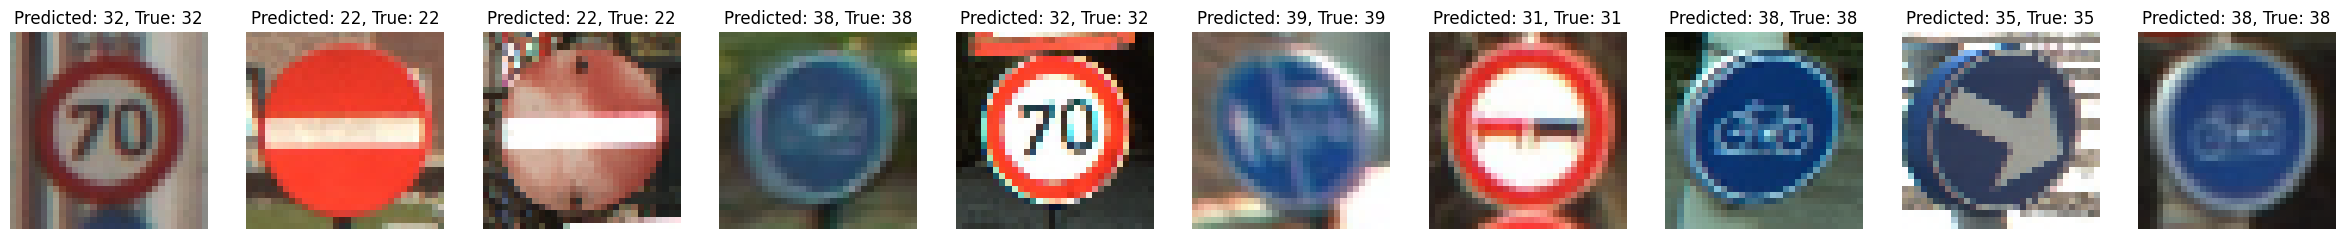

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as TF


# convert a tensor to a numpy image
def tensor_to_image(tensor):
    # convert and move the color dimension back
    return np.transpose(tensor.numpy(), (1, 2, 0))

# choose some images from the test set
num_images_to_show = 10
indices = np.random.choice(len(x_test_tensor), num_images_to_show, replace=False)

# prepare the model for evaluation
net.eval()

fig, axes = plt.subplots(1, num_images_to_show, figsize=(30, 10))
for i, idx in enumerate(indices):
    image = x_test_tensor[idx]
    label = y_test_tensor[idx]

    # extra batch dimension since pytorch expects batches
    image_batch = image.unsqueeze(0)

    # prediction
    with torch.no_grad():
        output = net(image_batch)
        predicted_label = output.argmax(dim=1, keepdim=True)  # index of the max log-probability

    # tensor image to a numpy image
    axes[i].imshow(tensor_to_image(image))
    axes[i].set_title(f"Predicted: {predicted_label.item()}, True: {label}")
    axes[i].axis('off')

plt.show()


**7. feladat (szorgalmi).** Vizsgáld meg a prediktív teljesítményt egy gyakori és egy ritka osztályon a bináris klasszifikációnál tanult metrikák alapján (ROC és PR görbe alatti terület).

In [13]:
net.eval()
y_true = []
y_score = []

with torch.no_grad():
    for x_batch, y_batch in DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=256, shuffle=False):
        outputs = net(x_batch)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        y_score.extend(probabilities.numpy())
        y_true.extend(y_batch.numpy())

y_true = np.array(y_true)
y_score = np.array(y_score)


In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_score, class_index, class_label):
    # conv to binary labels
    y_true_binary = (y_true == class_index).astype(int)

    # ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true_binary, y_score[:, class_index])
    roc_auc = auc(fpr, tpr)

    # ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for "{class_label}"')
    plt.legend(loc="lower right")
    plt.show()


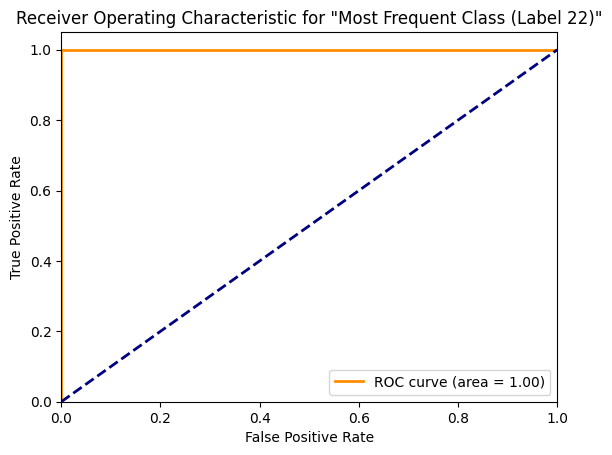

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


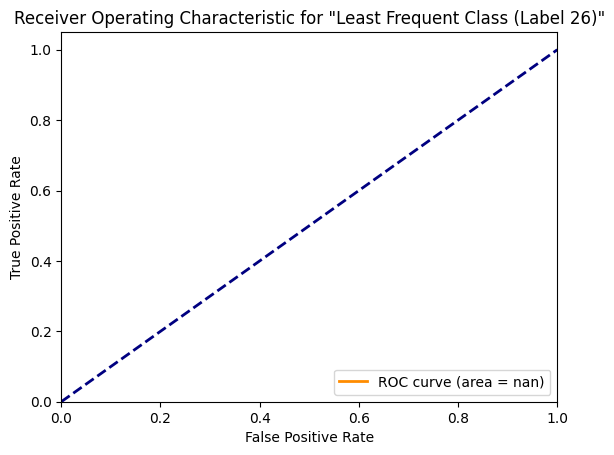

In [15]:
plot_roc_curve(y_true, y_score, most_frequent_label, f'Most Frequent Class (Label {most_frequent_label})')

plot_roc_curve(y_true, y_score, least_frequent_label, f'Least Frequent Class (Label {least_frequent_label})')


In [16]:
test_loader = DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=256, shuffle=False)
net.eval()

all_preds = []
all_probs = []
with torch.no_grad():
    for x, y in test_loader:
        outputs = net(x)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)
        all_probs.extend(probs.numpy())
        all_preds.extend(preds.numpy())

all_probs = np.array(all_probs)
all_probs

array([[1.4963121e-15, 1.9208053e-14, 1.4910707e-14, ..., 6.8483322e-19,
        1.9398230e-07, 2.1600265e-11],
       [3.7128178e-16, 1.0273984e-12, 3.7379113e-14, ..., 2.9782571e-19,
        1.3119668e-06, 1.3228879e-07],
       [1.4260751e-09, 3.1699685e-09, 1.9078008e-09, ..., 9.6429219e-14,
        3.1988006e-05, 1.6826467e-08],
       ...,
       [2.7426689e-20, 2.0846179e-21, 9.2962962e-19, ..., 9.9477758e-28,
        9.3566190e-15, 1.7264799e-24],
       [4.8826893e-17, 1.2366217e-15, 2.8902672e-13, ..., 2.3851430e-22,
        4.4821001e-11, 1.2784962e-17],
       [4.1027828e-13, 5.1946576e-14, 1.4219036e-12, ..., 3.9635701e-19,
        5.0012648e-08, 1.6865269e-13]], dtype=float32)

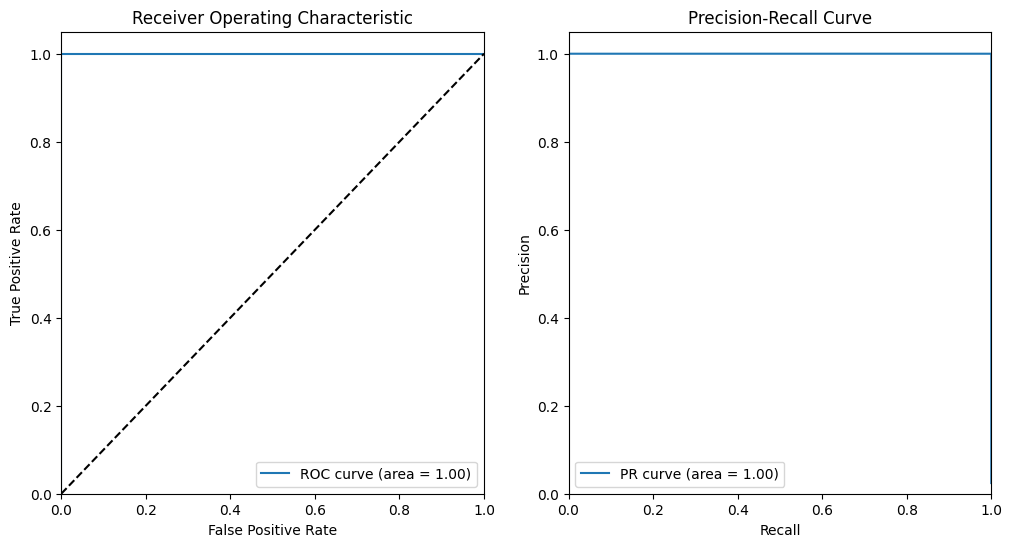

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


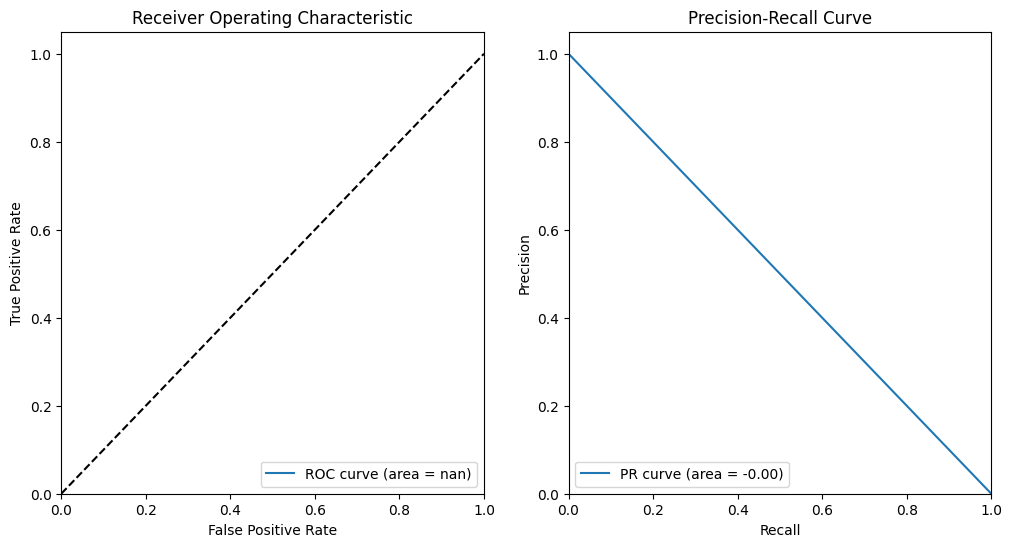

In [17]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr_curves(y_true, y_score, class_id):
    # binary representation
    y_bin = (y_true == class_id).astype(int)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_bin, y_score[:, class_id])
    roc_auc = auc(fpr, tpr)

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_bin, y_score[:, class_id])
    pr_auc = average_precision_score(y_bin, y_score[:, class_id])

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.show()

y_test_array = np.array(y_test_tensor)
plot_roc_pr_curves(y_test_array, all_probs, most_frequent_label)
plot_roc_pr_curves(y_test_array, all_probs, least_frequent_label)
